# Project: Model Usage - Image Classification and Transfer Learning

## Project Description:

Welcome to your new project! You will have the opportunity to apply the knowledge and skills you've learned in class.

The tasks are divided into two parts, the first part is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

In the second part is transfer learning where you'll use a [Vision Transformer (ViT)](https://huggingface.co/google/vit-base-patch16-224-in21k) model pre-trained on ImageNet-21k and fine-tune it on the [FastJobs/Visual_Emotional_Analysis](https://huggingface.co/datasets/FastJobs/Visual_Emotional_Analysis) dataset for emotion recognition, with the final step being the publication of your trained model to the Hugging Face Model Hub.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Installation and Import Package

In [ ]:
!pip install transformers
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 627.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [ ]:
# import package
from transformers import pipeline
from PIL import Image
from io import BytesIO

import requests
import gradio as gr

## Task 1 Image Classification using Pipeline

### Step 1: Image Classification using Hugging Face's Model

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, and uses the Hugging Face's model to predict the age of the person in the image. You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

#### Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

In [ ]:
# @title #### 01. Image Classification using Hugging Face's Model

# fetch the image from the URL
img_url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# load the age classifier pipeline from hugging face
age_classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

# predict the image
predictions = age_classifier(img)

# display result of predictions
print(predictions)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'label': '3-9', 'score': 0.8102952837944031}, {'label': '0-2', 'score': 0.09772922843694687}, {'label': '10-19', 'score': 0.04794551432132721}, {'label': '20-29', 'score': 0.014716701582074165}, {'label': '30-39', 'score': 0.011733355931937695}]


In [ ]:
# extract the probability for the age group 3-9
age_3_9 = None
for prediction in predictions:
  if prediction['label'] == "3-9":
    age_3_9 = prediction['score']

# display the result
print(f"Persentase untuk rentang usia '3-9': {age_3_9:.5f}")

Persentase untuk rentang usia '3-9': 0.81030


### Step 2: Image Classification using Hugging Face's Model and Gradio

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

#### Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [ ]:
# @title #### 02. Image Classification using Hugging Face's Model and Gradio

# Put your code here:


# ---- End of your code ----

Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

In [ ]:
# load the age classifier pipeline from hugging face
age_classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

# define the prediction function
def predict_age(img):
  # predict the image
  predictions = age_classifier(img)

  # get the highest scoring prediction
  top_prediction = max(predictions, key=lambda x: x['score'])

  # return the label with the highest score
  return {"score": top_prediction['score'], "label": top_prediction['label']}

  # create the gradio interface
iface = gr.Interface(
    fn=predict_age,
    inputs=gr.Image(type="pil"),
    outputs="json",
    title="Age Group Prediction",
    description="Upload an image to predict the age group of the person in the image using a pre-trained model."
)

# launch the gradio interface
iface.launch()

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f51032fff4b6575d18.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# define the prediction function
def predict_age(img):
  # predict the image
  predictions = age_classifier(img)

  # get the highest scoring prediction
  top_prediction = max(predictions, key=lambda x: x['score'])

  # return the label with the highest score
  return {"score": top_prediction['score'], "label": top_prediction['label']}

In [ ]:
# create the gradio interface
iface = gr.Interface(
    fn=predict_age,
    inputs=gr.Image(type="pil"),
    outputs="json",
    title="Age Group Prediction",
    description="Upload an image to predict the age group of the person in the image using a pre-trained model."
)

# launch the gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://debff18b956db256f4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.

# Task 2: Transfer Learning for Emotion Recognition

### Step 1: Environment Setup

In this section, we start by installing the necessary packages and logging into Hugging Face's platform:
- `transformers`
- `datasets`
- `evaluate`
- `huggingface_hub`

In [ ]:
# Install necessary packages
!pip install transformers datasets evaluate huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is i

After installing, use the Hugging Face's notebook login function to log into Hugging Face's platform. Execute the following commands in your cell:

In [ ]:
!pip uninstall pyarrow
!pip install --no-cache-dir pyarrow

Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/benchmarks/*
    /usr/local/lib/python3.10/dist-packages/cmake_modules/AWSSDKVariables.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/BuildUtils.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/DefineOptions.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindAWSSDKAlt.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindAzure.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindBrotliAlt.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindClangTools.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindGTestAlt.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindInferTools.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindLLVMAlt.cmake
    /usr/local/lib/python3.10/dist-packages/cmake_modules/FindOpenSSLAlt.cmake
 

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from huggingface_hub import notebook_login
# from datasets import load_dataset
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from datasets import load_dataset

In [ ]:
# Log into Hugging Face's platform

# Put your code here:
notebook_login()
# ---- End of your code ----

### Step 2: Load the Dataset

Load the "FastJobs/Visual_Emotional_Analysis" dataset and split it into training and test sets with a test size of 0.2.

> **Note**: please assign to variable `emotion`

In [ ]:
# Load the dataset

emotion = load_dataset("FastJobs/Visual_Emotional_Analysis")
print(emotion.keys())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/800 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

dict_keys(['train'])


In [ ]:
emotion['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 800
})

In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Load the dataset
emotion = load_dataset("FastJobs/Visual_Emotional_Analysis")

# Convert the dataset to pandas DataFrame (if necessary)
df = emotion['train'].to_pandas()

# Split the data into train and test (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


Resolving data files:   0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
from datasets import Dataset

# Mengonversi DataFrame Pandas ke Dataset Hugging Face
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Periksa beberapa entri untuk memastikan path gambar valid
print(train_df.head())
print(test_df.head())


                                                 image  label
264  {'bytes': None, 'path': '/root/.cache/huggingf...      2
615  {'bytes': None, 'path': '/root/.cache/huggingf...      6
329  {'bytes': None, 'path': '/root/.cache/huggingf...      3
342  {'bytes': None, 'path': '/root/.cache/huggingf...      3
394  {'bytes': None, 'path': '/root/.cache/huggingf...      3
                                                 image  label
696  {'bytes': None, 'path': '/root/.cache/huggingf...      6
667  {'bytes': None, 'path': '/root/.cache/huggingf...      6
63   {'bytes': None, 'path': '/root/.cache/huggingf...      0
533  {'bytes': None, 'path': '/root/.cache/huggingf...      5
66   {'bytes': None, 'path': '/root/.cache/huggingf...      0


**Label Mapping**

> **Note**: no need to change the code below! Just run it to map labels from the dataset.

In [ ]:
labels = emotion["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

### Step 3: Explore and Visualize the Dataset

In this step, you are required to visualize the first instance in the training dataset.

> **Note**: no need to change the code below! Just run it to visualize the dataset based on index.

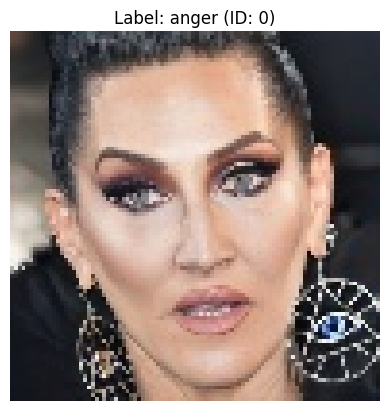

In [ ]:
import matplotlib.pyplot as plt

# Define the function to convert label index to label name
id2label_view = {str(i): label for i, label in enumerate(labels)}

# Use first training example
image = emotion['train'][0]['image'] # Explore image by index
label_id = str(emotion['train'][0]['label'])
label_name = id2label_view[label_id]

# Display the image and its corresponding label
plt.imshow(image)
plt.title(f'Label: {label_name} (ID: {label_id})')
plt.axis('off')
plt.show()

### Step 4: Preprocess the Data

You need to define the transformation function for image preprocessing and apply it to the dataset.

In [ ]:
from transformers import AutoImageProcessor
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor
from PIL import Image

# Load the image processor
image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k', use_fast=True)

# Define the transforms using torchvision.transforms
transform = Compose([
    RandomResizedCrop(size=(224,224)),  # Resize gambar
    ToTensor(),                   # Ubah gambar menjadi tensor
    Normalize(mean=image_processor.image_mean, std=image_processor.image_std)  # Normalisasi gambar
])

# Define the transformation function
def preprocess_function(examples):
    # Ekstrak path gambar dari dictionary
    image_paths = [item['path'] for item in examples['image']]

    # Buka gambar menggunakan path dan konversi ke format RGB
    images = [Image.open(image_path).convert("RGB") for image_path in image_paths]

    # Print types
    print(f"Images type: {type(images)}")

    # Terapkan transformasi
    transformed_images = [transform(image) for image in images]

    # Print types
    print(f"Transformed images type: {type(transformed_images)}")

    # Kembalikan gambar yang sudah diproses
    return {'pixel_values': transformed_images}


# Terapkan transformasi pada dataset pelatihan dan pengujian
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

print(train_dataset[0])
print(test_dataset[0])


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Map:   0%|          | 0/640 [00:00<?, ? examples/s]

Map:   0%|          | 0/160 [00:00<?, ? examples/s]

{'image': {'bytes': None, 'path': '/root/.cache/huggingface/datasets/downloads/4225327734b357fcbaae4d38a63007c57cce8e38ea6c48739c40c672eb3b09ae'}, 'label': 2, '__index_level_0__': 264, 'pixel_values': [[[-0.4901960492134094, -0.4901960492134094, -0.4901960492134094, -0.4823529124259949, -0.4745097756385803, -0.4745097756385803, -0.4823529124259949, -0.545098066329956, -0.6078431606292725, -0.6627451181411743, -0.7098039388656616, -0.6705882549285889, -0.6235294342041016, -0.5843137502670288, -0.5372549295425415, -0.5058823823928833, -0.4745097756385803, -0.4431372284889221, -0.41960781812667847, -0.38823527097702026, -0.35686272382736206, -0.32549017667770386, -0.29411762952804565, -0.2862744927406311, -0.29411762952804565, -0.3019607663154602, -0.30980390310287476, -0.30980390310287476, -0.3019607663154602, -0.3019607663154602, -0.29411762952804565, -0.27843135595321655, -0.23137253522872925, -0.18431371450424194, -0.13725489377975464, -0.08235293626785278, -0.03529411554336548, 0.011

### Step 5: Model Setup

In this step, define the model architecture with the pre-trained ViT model and load it.

In [ ]:
from transformers import AutoModelForImageClassification
import torch

# Define the model
model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(label2id)
)

# Check if CUDA is available and move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model architecture to verify
print(model)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

### Step 6: Training Setup

Define the training arguments and instantiate the trainer.

In [ ]:
import evaluate

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

In [ ]:
# Define compute metric function
def compute_metrics(p):
    # Extract predictions and labels
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    # Compute accuracy
    return accuracy_metric.compute(predictions=preds, references=labels)


In [ ]:
from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    output_dir='./emotion_recognition',          # Directory to save results and model checkpoints
    eval_strategy="steps",     # Evaluate model at the end of each epoch
    learning_rate=5e-5,              # Learning rate for optimizer
    per_device_train_batch_size=32,  # Batch size for training
    per_device_eval_batch_size=32,   # Batch size for evaluation
    num_train_epochs=5,              # Number of epochs for training
    weight_decay=0.01,               # Weight decay for regularization
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=50,                # Log every 10 steps
    save_steps=50,                   # Save model checkpoint every 10 steps
    load_best_model_at_end=True,     # Load the best model at the end of training
    metric_for_best_model='accuracy' # Metric to use for selecting the best model
)


To use Hugging Face `Trainer` you need to install the `accelerate` library version `0.20.1` or later. It is used for performance enhancement on PyTorch.

In [ ]:
%pip install accelerate -U

In [ ]:
from transformers import DefaultDataCollator

# Instantiate the trainer
data_collator = DefaultDataCollator()
trainer = Trainer(
    model=model,                      # The model to train
    args=training_args,               # Training arguments
    data_collator=data_collator,      # Data collator
    train_dataset=train_dataset,      # Training dataset
    eval_dataset=test_dataset,        # Evaluation dataset
    compute_metrics=compute_metrics   # Function to compute metrics
)

# Print trainer instance to verify
print(trainer)

If there are problems when using the Trainer after installing `accelerate` you can restart the Kernel

### Step 7: Train and Evaluate the Model

Now, you are ready to train the model and evaluate it on the test set.

In [ ]:
# Train the model
trainer.train()

TrainOutput(global_step=100, training_loss=1.1598170852661134, metrics={'train_runtime': 476.7806, 'train_samples_per_second': 6.712, 'train_steps_per_second': 0.21, 'total_flos': 2.479877018615808e+17, 'train_loss': 1.1598170852661134, 'epoch': 5.0})

In [ ]:
# Evaluate the model
eval_result = trainer.evaluate()

# Save the formatted accuracy in a variable
accuracy_str = "{:.4f}".format(eval_result["eval_accuracy"])

# Print the accuracy
print(f"Model Accuracy: {accuracy_str}")

Model Accuracy: 0.4562


### Step 8: Publishing the Trained Model

Finally, make sure to push your trained model to the Hugging Face Model Hub.

> **Note**: No need to change the code below! Just run to publish your model.

In [ ]:
trainer.push_to_hub()

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dwililiya/emotion_recognition/commit/1577e8293b357f6019d46da804345584d75feba0', commit_message='End of training', commit_description='', oid='1577e8293b357f6019d46da804345584d75feba0', pr_url=None, pr_revision=None, pr_num=None)

Once you've trained your model and pushed it to the Hugging Face Model Hub, you'll have a link that points directly to your model's page. You can share this link with others, and they can use it to directly load your model for their own uses.

The following link is an example of what a trained model's page looks like: https://huggingface.co/aditira/emotion_classification. This is not your model, but rather an example of what your final result might resemble.

Remember, for this project you should push your output model to your own Hugging Face account. The link for your model will be different and should reflect your own username and model name.


huggingface_model_link = "https://huggingface.co/dwililiya/emotion_recognition"

### Step 9:  Build an Interactive Application with Gradio

In this task, you will be building an interactive application using Gradio that will use your fine-tuned emotion recognition model along with another pretrained model ('`nateraw/vit-age-classifier`') to guess the emotion and age from an input image.

Please make sure to:
- Install the necessary package (`gradio`) for creating the web-based interface.
- Load your fine-tuned model as well as the pretrained model '`nateraw/vit-age-classifier`'.
- Define a function that will take an image as input and return the predicted emotion and age.
- Utilize Gradio to create an Interface (UI) for your function, allowing users to upload images and see the predicted emotion and age.

In [ ]:
# Install Gradio
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

#### Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- Image name screenshot is `submission.jpg`
- You should upload a person's image to that app
- The score should be included at the screenshot

In [ ]:
import gradio as gr
from transformers import AutoModelForImageClassification, AutoImageProcessor
import torch
from PIL import Image

In [ ]:
import gradio as gr
from transformers import AutoImageProcessor, AutoModelForImageClassification, pipeline
from PIL import Image
import torch

# Load the emotion model and processor
emotion_processor = AutoImageProcessor.from_pretrained("dwililiya/emotion_recognition", use_fast=True)
emotion_model = AutoModelForImageClassification.from_pretrained("dwililiya/emotion_recognition")

# Load the age model
age_classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

# Define the list of emotion labels
emotion_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def predict_emotion_and_age(image):
    # Preprocess the image (resize, normalize, etc.) for emotion model
    emotion_inputs = emotion_processor(images=[image], return_tensors="pt")

    # Move inputs to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    emotion_inputs = {k: v.to(device) for k, v in emotion_inputs.items()}
    emotion_model.to(device)

    # Make predictions with the emotion model
    emotion_model.eval()
    with torch.no_grad():
        emotion_outputs = emotion_model(**emotion_inputs).logits
    emotion_probabilities = torch.nn.functional.softmax(emotion_outputs, dim=-1).squeeze().tolist()
    emotion_predictions = [{"label": emotion_labels[i], "score": prob} for i, prob in enumerate(emotion_probabilities)]
    top_emotion = max(emotion_predictions, key=lambda x: x['score'])

    # Make predictions with the age model
    age_result = age_classifier(image)
    top_age_prediction = max(age_result, key=lambda x: x['score'])

    # Return both emotion and age predictions
    return {
        "emotion": {"label": top_emotion['label'], "score": top_emotion['score']},
        "age": {"label": top_age_prediction['label'], "score": top_age_prediction['score']}
    }

# Create Gradio interface
iface = gr.Interface(
    fn=predict_emotion_and_age,
    inputs=gr.Image(type="pil"),
    outputs=gr.JSON()  # Use JSON to format the dictionary output
)

# Launch the Gradio interface
iface.launch()


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://093ea9a0f6e750352f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-4-transfer-learning/gradio_emotion_age_app.png)